# 1. 기본(필수) 기능   
본 프로젝트는 Kaggle에서 제공하는 Netflix 주가 데이터를 활용하여, 
Pandas 및 Matplotlib을 통해 시계열 데이터 전처리 → 분석 → 시각화의 
전체 흐름을 실습하는 것을 목표로 한다. 
각 기능을 함수 단위로 구현하며, 실제 데이터 처리와 해석의 기본 역량을 
함양하게 된다. 

## F01
* A. 데이터 수집 
  * Kaggle에서 넷플릭스 주가 데이터를 다운로드한다. -> 완료
* B. 데이터 전처리 
  * Pandas를 활용하여 CSV 파일을 불러온다. (요구사항 F01) 
  * CSV 구조를 확인하고 필요한 컬럼만 선별한다. 
  * ✓ 사용 필드: Date, Open, High, Low, Close

In [4]:
! pip install numpy
! pip install pandas
! pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [121]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [154]:
# 데이터 프레임 생성
# Date, Open, High, Low, Close만 불러오기
df = pd.read_csv('archive/NFLX.csv', encoding='cp949', usecols=['Date', 'Open', 'High', 'Low', 'Close'])
df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


## F02
* 2021년 이후의 데이터만 필터링한다. (요구사항 F02)
  * 필터링 완료된 DataFrame의 종가 데이터를 그래프로 시각화한다.

In [156]:
# Date column을 datetime64[ns]로 바꾸기
df['Date'] = pd.to_datetime(df['Date'])
df
# 2021년 이후의 데이터만 남기기 위해 나머지 행 삭제하고, 새로운 데이터 프레임에 저장
idxs = df[df['Date'] < pd.Timestamp('2021-01-01')].index
after_2021_df = df.drop(idxs)

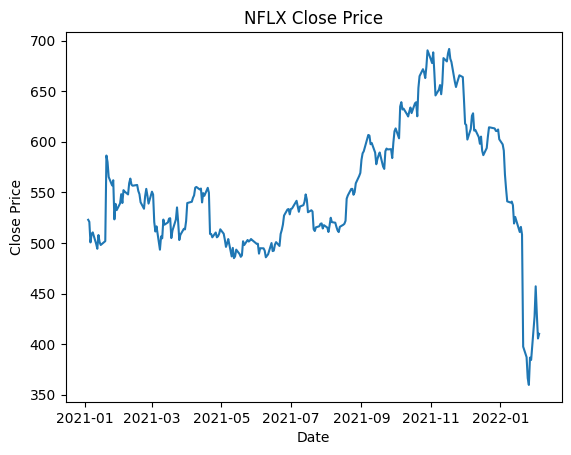

In [157]:
# 그래프

# 데이터 생성
x = list(after_2021_df['Date']) # x 좌표값
y = list(after_2021_df['Close']) # y 좌표값

# 그래프 그리기
plt.plot(x, y)

# 그래프에 제목과 축 레이블 추가
plt.title('NFLX Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')

# 그래프 표시
plt.show()

## F03
* 2021년 이후 데이터에서 종가(Close)의 최대/최소 값을 추출한다. (요구사항 F03)

In [158]:
max_price = max(list(after_2021_df['Close']))
min_price = min(list(after_2021_df['Close']))
print('최고 종가:', max_price)
print('최저 종가:', min_price)

최고 종가: 691.690002
최저 종가: 359.700012


## F04
* 2021년 이후 데이터를 월별로 그룹화하여 평균 종가 계산한다. (요구사항 F04)

In [164]:
after_2021_df['Month'] = after_2021_df['Date'].dt.strftime('%Y-%m')
group_month_after_2021_df = after_2021_df.groupby(after_2021_df['Month']).mean(numeric_only=True)

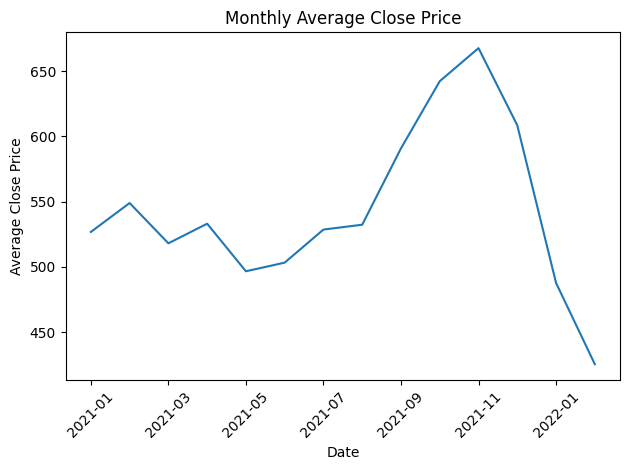

In [166]:
# 그래프

# 데이터 생성
x = list(group_month_after_2021_df.index) # x 좌표값
y = list(group_month_after_2021_df['Close']) # y 좌표값

# 그래프 그리기
plt.plot(x, y)

# 그래프에 제목과 축 레이블 추가
plt.title('Monthly Average Close Price')
plt.xlabel('Date')
plt.ylabel('Average Close Price')


# x축 눈금 간격 띄우기
plt.xticks(x[::2], rotation=45)

# 레이블 겹침 방지
plt.tight_layout()  
# 그래프 표시
plt.show()

## F05
* 2022년 이후의 데이터를 필터링하여, 월별 최고가, 최저가, 종가를 함께 표현하는 복합 라인 그래프를 작성한다. (요구사항 F05) 

In [167]:
# 2022년 이후의 데이터만 남기기 위해 나머지 행 삭제하고, 새로운 데이터 프레임에 저장

idxs = df[df['Date'] < pd.Timestamp('2022-01-01')].index
after_2022_df = df.drop(idxs)

In [169]:
# 일별로 그룹화 하기
group_month_after_2022_df = after_2022_df.groupby(df['Date']).mean(numeric_only=True)
group_month_after_2022_df

,Open,High,Low,Close
Date,,,,
2022-01-03,605.609985,609.989990,590.559998,597.369995
2022-01-04,599.909973,600.409973,581.599976,591.150024
2022-01-05,592.000000,592.840027,566.880005,567.520020
2022-01-06,554.340027,563.359985,542.010010,553.289978
2022-01-07,549.460022,553.429993,538.219971,541.059998
2022-01-10,538.489990,543.690002,526.320007,539.849976
2022-01-11,536.989990,543.909973,530.070007,540.840027
2022-01-12,544.270020,544.270020,532.020020,537.219971
2022-01-13,537.059998,540.789978,518.260010,519.200012


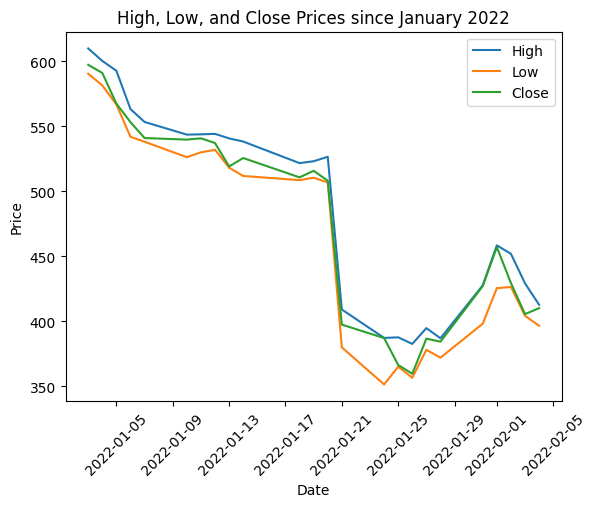

In [172]:
# 그래프

# 데이터 생성
x = list(group_month_after_2022_df.index) # x 좌표값
y1 = list(group_month_after_2022_df['High']) # 최고가
y2 = list(group_month_after_2022_df['Low']) # 최저가
y3 = list(group_month_after_2022_df['Close']) # 종가

# 그래프 그리기
plt.plot(x, y1, label='High')
plt.plot(x, y2, label='Low')
plt.plot(x, y3, label='Close')

# 범례 추가
plt.legend()

# 그래프에 제목과 축 레이블 추가
plt.title('High, Low, and Close Prices since January 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

# 그래프 표시
plt.show()

# 2. 심화 기능 
본 심화 기능은 생성형 AI(OpenAI, Gemini 등)를 활용하여 넷플릭스 주가 
데이터를 기반으로 자동 해석 또는 예측을 수행하는 기능을 중심으로 
구성된다. 
주가 시계열 데이터를 분석한 후, 생성형 AI에게 의미 있는 질문을 
구성하고, AI의 응답을 통해 인사이트를 도출하는 흐름으로 진행된다. 

## F06
* OpenAI, Gemini 등 생성형 AI에게 주가 데이터를 설명하거나 예측하는 
질문 프롬프트를 구성한다. (요구사항 F06)
* 매수/매도 판단 또는 데이터 해석이 가능하도록 프롬프트를 구성한다.

### 프롬프트 구성
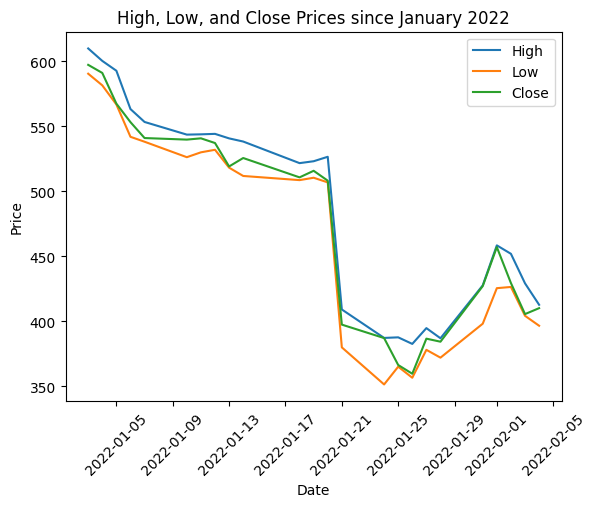

첨부한 사진은 2022년 1월부터 2월까지의 넷플릭스 주가 변화를 나타낸 그래프입니다. 그래프를 보고 넷플릭스의 주가 동향을 분석해주세요.

### GPT 답변

그래프를 바탕으로 2022년 1월부터 2월 초까지의 넷플릭스(NFLX) 주가 동향을 분석하면 다음과 같습니다:

---

## 📈 **주가 동향 요약**

### 1. **초기 구간 (2022-01-01 \~ 2022-01-20): 완만한 하락세**

* **High, Low, Close** 모두 600달러 수준에서 시작하여 약 520달러까지 점진적으로 하락
* 이 구간에서는 투자자들이 점진적으로 매도에 나서고 있는 모습
* 전반적으로 큰 변동 없이 완만한 **약세 추세**

---

### 2. **급락 구간 (2022-01-20 \~ 2022-01-24): 급격한 하락**

* **하루 만에 주가가 약 520달러 → 390달러 수준으로 급락**
* 특히 Low 가격이 370달러 아래까지 떨어짐
* \*\*어닝쇼크(실적 발표)\*\*나, **부정적 뉴스**, **시장 전반의 충격** 등이 원인일 가능성 큼

---

### 3. **회복 구간 (2022-01-25 \~ 2022-02-03): 기술적 반등**

* 이후 주가는 바닥을 찍고 서서히 반등
* **Close 가격이 390달러 → 430달러 수준으로 회복**
* 하지만 완전한 상승세라기보다는 \*\*약한 기술적 반등(조정)\*\*으로 보임

---

## 📊 **기술적 특징 요약**

| 구간         | 가격 범위         | 특징                 |
| ---------- | ------------- | ------------------ |
| 1월 초\~중순   | 약 600 → 520달러 | 완만한 하락             |
| 1월 20일 전후  | 약 520 → 370달러 | 단기 급락 (갭다운 가능성)    |
| 1월 말\~2월 초 | 약 370 → 430달러 | 기술적 반등, 거래심리 일부 회복 |

---

## 🔍 추가 분석 포인트

* **1월 20일 근처**에서 발생한 급락은 **뉴스 이벤트**(예: 실적 부진, 가입자 수 감소)와 관련 있을 가능성 큼
* 종가(Close)가 고가/저가보다 더 민감하게 반응하는 구간도 있음 → 투자자 심리 반영
* 단기간에 큰 하락 후 약간의 반등은 \*\*하락 추세 속 일시적 회복(데드캣 바운스)\*\*일 수 있음